# TechEd 2020 - INT166 - Document Classification workshop

In this notebook we will learn how to use the **Document Classification** service using a python based client library.

In this usage example we will use a pretrained model, which was trained to classify documents into the classes **invoice, purchase order and payment advice**. We will use a set of **fake invoices, purchase orders and payment advices which were generated for this workshop** to inspect the responses and judge the performance of the model.

### Workshop content

1. Installation and invocation of the client library
1. Inference with a pretrained model
1. Performance metrics of a classification model
1. **Optional:** Use confidence values to sort out documents from "Other" category

### Initial steps

**Note:** The following steps are required for the execution of this notebook:

1. See this [tutorial](https://developers.sap.com/tutorials/hcp-create-trial-account.html) to learn how to create a **SAP Cloud Platform Trial account**.
2. See this [tutorial](https://developers.sap.com/tutorials/cp-aibus-dc-service-instance.html) to learn how to create a **Document Classification service instance**.

Please keep the **service key** for the Document Classification service created in the 2nd step above at hand as we will use it below!

### 1. Installation and invocation of the client library

In this section we will:

- Install the python client library for the **Document Classification** service which is availible from the [python package index (PyPI)](https://pypi.org/project/sap-document-classification-client/)
- Pass the service key we obtained in the **initial steps above** to the client library which will use it to communicate with the [Document Classification REST API](https://aiservices-trial-dc.cfapps.eu10.hana.ondemand.com/document-classification/v1/)
- Import the client library package and create an instance of the client
- Try out and learn about the [API of the client library](https://github.com/SAP/document-classification-client/blob/master/API.md)

In [1]:
# Install the python client library for the Document Classification service 
!pip install sap-document-classification-client

In [2]:
# Pass the credentials to the client library

# Please copy the content of the service key you created in the Prerequisites above here after "service_key = "
service_key = {
  "url": "https://aiservices-trial-dc.cfapps.eu10.hana.ondemand.com",
  "uaa": {
    "tenantmode": "dedicated",
    "sburl": "https://internal-xsuaa.authentication.eu10.hana.ondemand.com",
    "subaccountid": "5564dc3a-4bdf-48ea-8c90-eb6ecd99ec40",
    "clientid": "sb-8aea69f9-b1f0-42d7-a348-e41f1ff0f5f1!b59514|bdp-ext-trial!b40454",
    "xsappname": "8aea69f9-b1f0-42d7-a348-e41f1ff0f5f1!b59514|bdp-ext-trial!b40454",
    "clientsecret": "tR70d8ZYTsKt9V+TgYg0ue9vr5s=",
    "url": "https://2ad9c500trial.authentication.eu10.hana.ondemand.com",
    "uaadomain": "authentication.eu10.hana.ondemand.com",
    "verificationkey": "-----BEGIN PUBLIC KEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAohbaggt5twuPuKBhUhmfkEsfIs/3Idep9p98Aj4qWaeRCkBj+sJ93+Uu1CzJ7CzuLcfNOx67/ZdXVE0fZHkV7iZLh9pABeTUCvKotRtr3Dk+RyQHSarh2y1QDsiT0xXLIL5SfjVCUbIWmjFnmNB/DM86PXL/upuouyD1sxwUtCCvtjOLWRRWICheXXYa9W6R0CMFp2yaqUPpkVD1pUWHXMooRGluf2qLdNNdqYQQoorx+A4W24txMMenI9sMpIjUTWwdOrNsSZGVKG+iiOGOKepPgrxcTRdA4SEXAt50ImFO0u+DdcyOEQq0QpJgHexOvdO6prE4wMlYjic8pU9OfwIDAQAB-----END PUBLIC KEY-----",
    "apiurl": "https://api.authentication.eu10.hana.ondemand.com",
    "identityzone": "2ad9c500trial",
    "identityzoneid": "5564dc3a-4bdf-48ea-8c90-eb6ecd99ec40",
    "tenantid": "5564dc3a-4bdf-48ea-8c90-eb6ecd99ec40",
    "zoneid": "5564dc3a-4bdf-48ea-8c90-eb6ecd99ec40"
  },
  "swagger": "/document-classification/v1"
}

# These 4 values are needed for communicating with the Document Classification REST API
api_url = service_key["url"]
uaa_server = service_key["uaa"]["url"]
client_id = service_key["uaa"]["clientid"]
client_secret = service_key["uaa"]["clientid"]

In [3]:
# Import client class from document classification client python package
from sap_document_classification_client.dc_api_client import DCApiClient
# Create an instance of this class with the credentials defined in the last cell
my_dc_client = DCApiClient(api_url, client_id, client_secret, uaa_server)

**Exercise:** Learn about different methods offered by the client library

- Try using tab completion (type `my_dc_client.` and then hit the tab key to explore methods on the client library instance)
- OR TRY the `?command` syntax used above to explore the possibilities availible to you via the client library!
- You can also list all fields of the client instance by using `dir(my_dc_client)`
- Try calling some methods, e.g. try to create an empty dataset by running `my_dc_client.create_dataset()` and confirm that is was created

In [4]:
# Get more information about a given method
?my_dc_client.create_dataset

Signature: my_dc_client.create_dataset()
Docstring:
Creates an empty dataset
:return: Object containing the dataset id
File:      /opt/conda/lib/python3.7/site-packages/sap_document_classification_client/dc_api_client.py
Type:      method


In [5]:
# Create a datset and persist the response from the REST API and extract the returned dataset ID
response = my_dc_client.create_dataset()
dataset_id = response["datasetId"]

In [6]:
# Try out the GET method for viewing all datasets in your tenant
my_dc_client.get_datasets_info()

{'datasets': [{'createdAt': '2020-10-15T18:55:21.204000',
   'datasetId': '3c5f08cc-c130-453f-a24e-7bef488d2fdb',
   'updatedAt': '2020-10-15T18:55:21.204000'},
  {'createdAt': '2020-10-09T13:23:46.386000',
   'datasetId': '45fa3968-bbf1-441b-a2eb-84c04c637524',
   'updatedAt': '2020-10-09T13:23:46.386000'},
  {'createdAt': '2020-09-21T06:57:48.221000',
   'datasetId': 'cec07563-54f3-496c-8a9f-06b27c065006',
   'updatedAt': '2020-09-21T06:57:48.221000'},
  {'createdAt': '2020-09-17T09:46:46.215000',
   'datasetId': '93051364-fe78-4893-8208-33bc1191bede',
   'updatedAt': '2020-09-17T09:46:46.215000'},
  {'createdAt': '2020-09-11T09:39:32.524000',
   'datasetId': 'fa877cb9-2455-40c4-9669-fd391bee563b',
   'updatedAt': '2020-09-11T09:39:32.524000'}]}

In [7]:
# Clean up the dataset again
my_dc_client.delete_dataset(dataset_id)

{'datasetId': '3c5f08cc-c130-453f-a24e-7bef488d2fdb'}

### 2. Inference with a pretrained model

In this section we will:

- Locate the example documents provided for this workshop
- **Classify those documents** using a pretrained model by sending them to the Document Classification REST API
- Investigate and understand the **classification results** returned by the REST API as well as have a look at the respective documents

In [8]:
# Find all pdf in the data subfolder of this repository recursively
from glob import glob
import os

filenames = glob(os.path.join("data", "**", "*.pdf"))

In [9]:
# Check which files we found
# Looks like we have 10 documents each in 4 subfolders which we will use as classes in this use case!
filenames

['data/Payment Advice/twitter.pdf',
 'data/Payment Advice/rc.pdf',
 'data/Payment Advice/umbro.pdf',
 'data/Payment Advice/chinese_blogger.pdf',
 'data/Payment Advice/navfac.pdf',
 'data/Payment Advice/guru_shop.pdf',
 'data/Payment Advice/engenharia_ambiental.pdf',
 'data/Payment Advice/beijing_2008.pdf',
 'data/Payment Advice/norsk_folkehjelp.pdf',
 'data/Payment Advice/flickr.pdf',
 'data/Other/twitter.pdf',
 'data/Other/bejing_2008.pdf',
 'data/Other/rc.pdf',
 'data/Other/umbro.pdf',
 'data/Other/chinese_blogger.pdf',
 'data/Other/navfac.pdf',
 'data/Other/guru_shop.pdf',
 'data/Other/engenharia_ambiental.pdf',
 'data/Other/norsk_folkehjelp.pdf',
 'data/Other/flickr.pdf',
 'data/Purchase Order/twitter.pdf',
 'data/Purchase Order/rc.pdf',
 'data/Purchase Order/umbro.pdf',
 'data/Purchase Order/chinese_blogger.pdf',
 'data/Purchase Order/navfac.pdf',
 'data/Purchase Order/guru_shop.pdf',
 'data/Purchase Order/engenharia_ambiental.pdf',
 'data/Purchase Order/beijing_2008.pdf',
 'data/

In [10]:
# This example shows the help for the method we will use for running inference on a batch of documents using a given model
?my_dc_client.classify_documents

Signature:
my_dc_client.classify_documents(
    documents_paths,
    model_name,
    model_version,
    silent=False,
)
Docstring:
Submits requests for classification of multiple documents, checks the response and returns the reference ID
for the classified documents

:param documents_paths: Paths to the PDF files on the disk
:param model_name: The name of the model that was successfully deployed to be used for the classification
:param model_version: The version of the model that was successfully deployed to be used for the classification
:param silent: If set to True will not throw an exception if classification for one or more documents failed
:return: Array of objects containing the reference ID of the classified document and the classification results
File:      /opt/conda/lib/python3.7/site-packages/sap_document_classification_client/dc_api_client.py
Type:      method


In [17]:
# This method will send the documents to the Document Classifcation API and return the results provided by the pretrained model
# Note that this can take up to 5 minutes to complete as the Document Classification service has process all 40 documents which involves:
# Running Optical character recognition on the document & running the pretrained model on the extracted words
results = my_dc_client.classify_documents(filenames, "document_type_first_test", "1")

**Exercise:** Learn about the format of the classification results returned by the client library

- Have a look at some documents and the classification results below (you can just modify the index and execute cells multiple times)
- Try to understand the json returned by the Document Classification REST API which is stored in `results`

In [18]:
# Here you can specify a document you would like to inspect in detail in the next 4 cells
# The index is referring to the list of documents we printed 3 cells above
document_index = 30

In [19]:
# Let's see what this document looks like
from IPython.display import IFrame
IFrame(filenames[document_index], width=600, height=800)

In [20]:
# Let's have a look at the response we got back for the first document
results[document_index]

{'documentId': '3af171af-01b2-4600-afb3-d717626f13d2',
 'predictions': [{'characteristic': 'document_type',
   'results': [{'label': 'Invoice', 'score': 0.359375},
    {'label': 'Payment Advice', 'score': 0.328125},
    {'label': 'Purchase Order', 'score': 0.3125}]}],
 'processedTime': '2020-10-15T19:03:37.108000',
 'status': 'SUCCEEDED',
 'document_path': 'data/Invoice/twitter.pdf'}

In [22]:
# This small loop will extract the important values in the response jsons and create vectors which are easier in the rest of the notebook
# predictions variable will contain class predicted with highest confidence
# confidences variable will contain confidence assigned by model for each class (will sum to 1 on each document as it was defined as multi-class)
import numpy as np

predictions = [] 
confidences = []
for result in results:
    temp = {}
    for label in result["predictions"][0]["results"]:
        temp[label['label']] = label['score']
    predictions.append(list(temp.keys())[np.argmax(list(temp.values()))])
    confidences.append(temp)
    
# We also store the ground truth for each document based on folder it was contained in
labels = list(map(lambda x: x.split("/")[1], filenames))

In [23]:
# The most intersting part here are the classification results for the first and only characteristic this model was trained on
# These results are contained in this field of the resposne
# Each number gives a probabilty the pretrained model assigned for this document belonging to the respective class
print("Predicted class: {}".format(predictions[document_index]))
print("Predicted confidences: {}".format(confidences[document_index]))
print("Ground truth:: {}".format(labels[document_index]))

Predicted class: Invoice
Predicted confidences: {'Invoice': 0.359375, 'Payment Advice': 0.328125, 'Purchase Order': 0.3125}
Ground truth:: Invoice


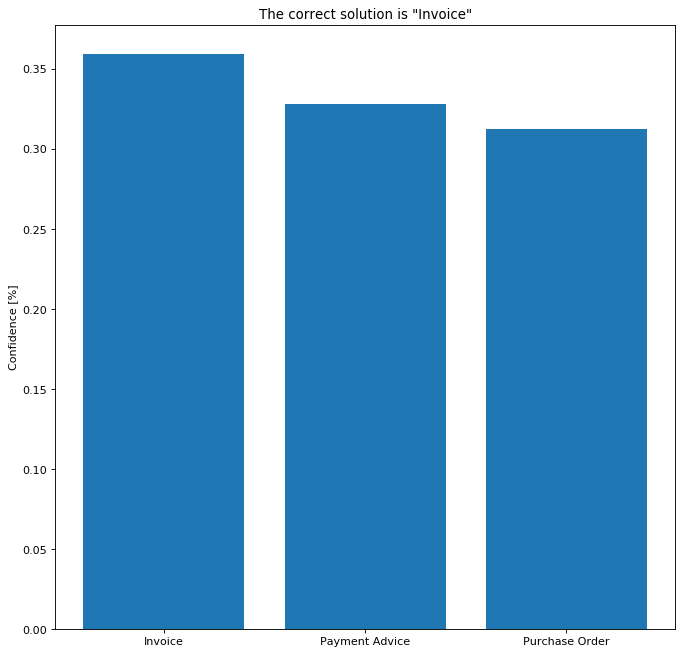

In [41]:
# Visualization of the response to this document as bar graph 
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax.bar(confidences[document_index].keys(), confidences[document_index].values())
ax.set_ylabel("Confidence [%]")
ax.set_title("The correct solution is \"{}\"".format(labels[document_index]))
fig.show()

### 3.Performance metrics of a classification model

In this section we will:

- Extract the **ground truth** from the folder hierachy our documents were already sorted into prior to this workshop
- Learn about performance metrics for a classification model including the concepts of **type 2 errors**, **precision and recall**
- Learn about two important visualizations to judge performance of a classifier: **confusion matrices** and **precision recall curves**

In [45]:
# Count occurences of labels in our ground truth vector
from collections import Counter
label_counts = Counter(labels)
unique_labels = sorted(list(label_counts.keys()))

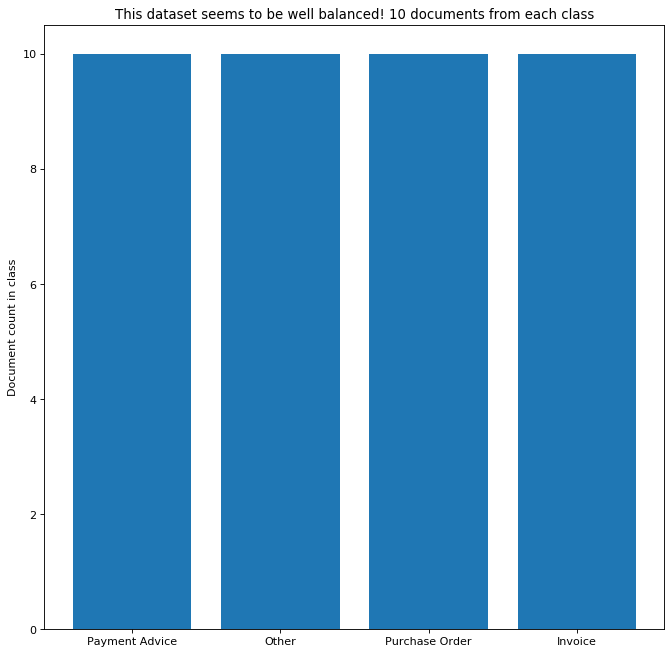

In [40]:
# Check the distibution of the labels (i.e. whether we have a well-balanced test set here)
fig, ax = plt.subplots(1,1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax.bar(label_counts.keys(), label_counts.values())
ax.set_ylabel("Document count in class")
ax.set_title("This dataset seems to be well balanced! 10 documents from each class")
fig.show()

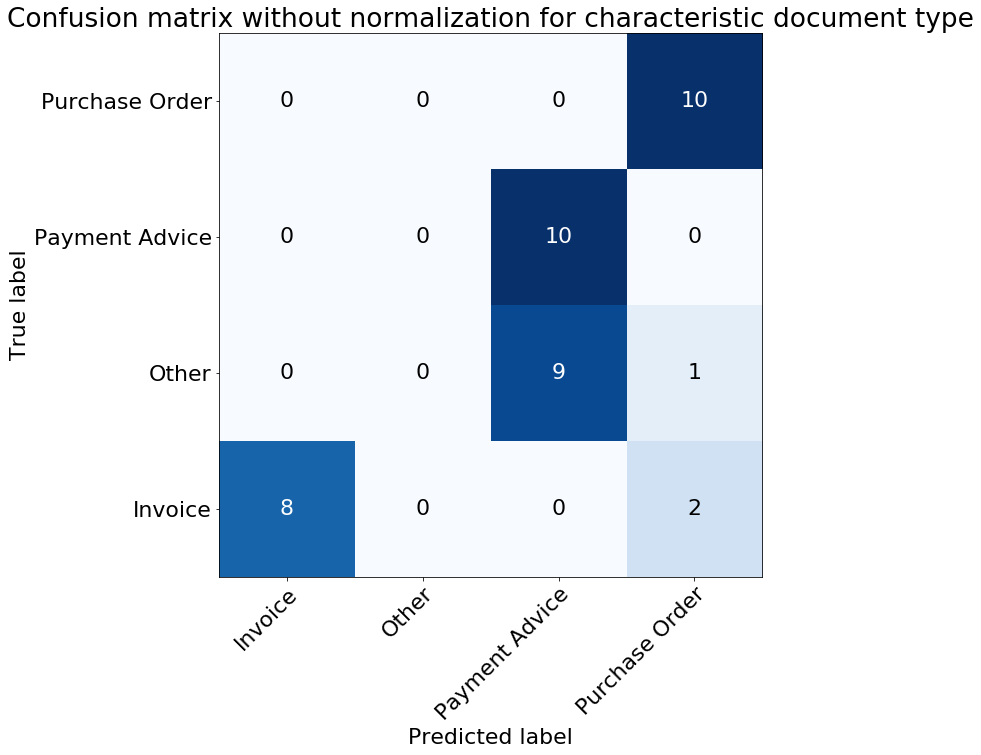

In [47]:
# Next we will visualize the type 2 error matrix also known as confusion matrix
from sklearn.metrics import confusion_matrix

font = {'size': 22}
plt.rc('font', **font)

def plot_confusion_matrix(ax, y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """ 

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

        # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel="True label",
           xlabel="Predicted label",
           xlim=(-0.5,len(classes)-0.5),
           ylim=(-0.5,len(classes)-0.5))


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')

    # Loop over data dimensions and create text annotations (number in each rectangle)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

# In this figure we can see that no document of the "Other" category was predicted as such -> 9 were classified as PA, 1 as PO
# This is expected as we did not train our model to predict this category (a update we might add soon, stay tuned!)
# From the other 30 documents 2 were missclassified yielding an accuracy of 93.3% for these classes
# The two missclassifcations in this category should be investigated below
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plot_confusion_matrix(ax, labels, predictions, unique_labels, normalize=False)
plt.title("Confusion matrix without normalization for characteristic document type")
fig.show()

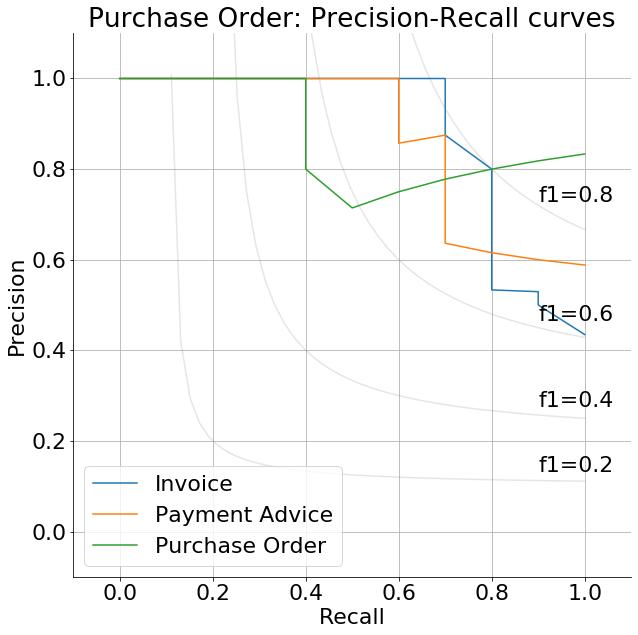

In [63]:
## Visualize PR curve for each class in the one characteristic the model predicts
from sklearn.metrics import precision_recall_curve

def plot_f_score(ax):
    f_scores = np.linspace(0.2, 0.8, num=4)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = ax.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        ax.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for label in unique_labels:
    if not label == "Other":
        gt = [subelement == label for subelement in labels]
        confidence = [subelement[label] for subelement in confidences]
        precision, recall, thresholds = precision_recall_curve(gt, confidence)
        ax.plot(recall, precision, label=label)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.set_title('{}: Precision-Recall curves'.format(label))   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='lower left')
ax.grid()
plot_f_score(ax)
fig.show()

**Exercise:** Understand the classification errors

- Determine which documents where misclassified using the vectors `labels` and `predictions` (ignore "Other" category)
- Display these documents and compare with other documents of that ground truth class, can you come up with a distinguishing feature?
- OR: Plot a confusion matrix without the documents from the other category
- OR: Plot the P/R curves without the documents from the other category

## 4. Use confidence values to sort out documents from "Other" category

In this section we will:

- Visualize the confidences predicted for the different ground truth classes
- Understand how we can use this visualization and thresholds on the predictions to modify model to our requirements

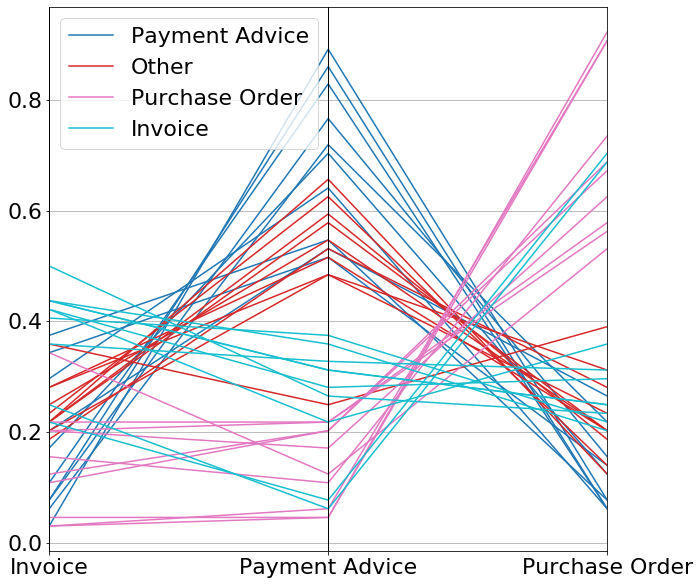

In [76]:
# We put the classification results into a pandas data frame to visualize the distribution of confidences w.r.t. ground truth classes
import pandas as pd
data = pd.DataFrame({'Ground Truth': labels,
                     'Invoice': map(lambda x:x["Invoice"], confidences),
                     'Payment Advice': map(lambda x:x["Payment Advice"], confidences),
                     'Purchase Order': map(lambda x:x["Purchase Order"], confidences),})
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pd.plotting.parallel_coordinates(data, 'Ground Truth', colormap=plt.get_cmap("tab10"))
plt.legend(loc='upper left')
fig.show()

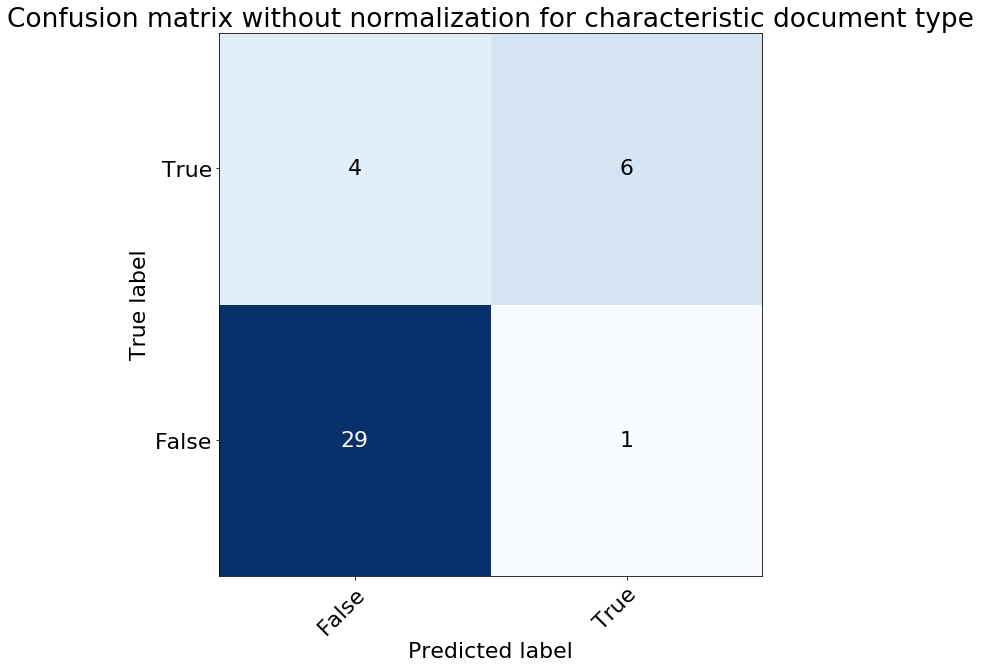

In [87]:
# Define thresholds to sort out documents belonging to the "Other" category
others_heuristic = [0.4 < elem["Payment Advice"] < 0.6 and elem["Purchase Order"] > 0.2 for elem in confidences]
others_ground_truth =  [elem == "Other" for elem in labels]
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plot_confusion_matrix(ax, others_ground_truth, others_heuristic, [False, True], normalize=False)
plt.title("Confusion matrix without normalization for characteristic document type")
fig.show()

**Exercise:** Understand the confidence scores

- How can we improve the heuristic thresholds (5 our of 40 wrong in example)? Can we use a small scikit model for example?
- Can you plot the confusion matrix of the whole classification task if we assume this heuristic would be applied as post processing step
- Start a discussion on which potential issues this approach could have? What would be approaches to make it more sound statistically?

## Further reading

Further information about the product can be found here:

- [SAP Help](https://help.sap.com/dc)
- [Python Client library](https://github.com/SAP/document-classification-client)
- [Developer Tutorials](https://developers.sap.com/tutorial-navigator.html?tag=products:technology-platform/sap-ai-business-services/document-classification)

**Note:** This notebook covers inference and analysis of the responses of a pretrained model provided by the service itself.  
Usually the different documents encountered in different settings and/or the requirement of defining custom classes one wants to predict, require training of ones own custom model. Under the **Developer Tutorials** link above a tutorial on how to **train a custom Document Classification model** can be found.

In [ ]:
# THE END, in case you reached here you can play around and wait for the others to catch up